In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import random
import pickle

In [4]:
# Load dataframe median
with open("./median_graph.p", 'rb') as f:  # notice the r instead of w
    median_graph = pickle.load(f)

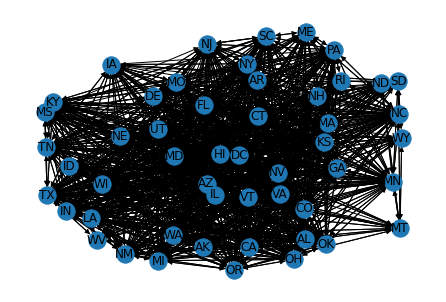

In [9]:
nx.draw(median_graph, with_labels=True)
plt.show()